In [1]:
import random
from typing import Optional

from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from tqdm import tqdm

from arcworld.dsl.arc_types import Shapes
from arcworld.internal.constants import Example, Task
from arcworld.schematas.oop.drop.transforms import (
    DropBidirectional,
    DropBidirectionalDots,
    Gravitate,
)
from arcworld.shape.dsl.generator import ShapeGeneratorDSL
from arcworld.storage.fingerprint import hash_task, normalize_task
from arcworld.storage.table import Base, Schemata


c:\Users\test\anaconda3\envs\arcworld_kevin\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:

class Gravity(Schemata):
    __tablename__ = "gravity"


def generate(N_tasks: int, N_examples: int, seed: Optional[int] = None):  # noqa
    if seed:
        print(f"Seed: {seed}")

    random.seed(seed)

    generator = ShapeGeneratorDSL(max_variations=30)
    shapes: Shapes = generator.generate_random_shapes()
    print("Total number of generated shapes: ", len(shapes))

    for _ in tqdm(range(N_tasks), desc="Generating tasks"):
        transform = random.choice(
            [Gravitate, DropBidirectional, DropBidirectionalDots]
        )()

        filtered_shapes = shapes
        for filter in transform.filters:
            filtered_shapes = filter.filter(filtered_shapes)

        sampler = transform.grid_sampler()

        task: Task = []
        try:
            for _ in range(N_examples):
                grid_builder = sampler()
                input_grid = grid_builder.build_input_grid(filtered_shapes)
                ouput_grid = transform.transform(input_grid)

                example = Example(input=input_grid.grid_np, output=ouput_grid.grid_np)

                task.append(example)
        except Exception:
            pass
        else:
            yield task, transform.program


engine = create_engine("sqlite:////Users/kev/tasks.db", echo=False)

N = 20000
succesful = 0
# seed = random.randint(1, 1000)
seed = 13
store = True

with Session(engine) as session:
    if store:
        Base.metadata.create_all(engine)

    for task, program in generate(N, 4, seed):
        if store:
            session.add(
                Gravity(
                    id=hash_task(task),
                    author=AUTHOR,
                    transformation=program,
                    task=normalize_task(task),
                )
            )
            session.commit()
        succesful += 1

print(f"Succesfull ratio {succesful}/{N}")


OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [10]:
AUTHOR = 'KEVIN'
x = []
for task, program in generate(3, 4, seed = 2):
    x.append(Gravity(id=hash_task(task),
                    author=AUTHOR,
                    transformation=program,
                    task=normalize_task(task),))

Seed: 2


Augmenting shapes: 100%|██████████| 1600/1600 [00:02<00:00, 779.71it/s]


Total number of generated shapes:  14873


Generating tasks: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]


In [29]:
import numpy as np
def from_grid_list_to_dict(grid_list__):
    returned_grid_list = []
    for i in range(4):

        input_grid = np.array(grid_list__[i][0])
        output_grid = np.array(grid_list__[i][1])

        i=0
        j=0
        while input_grid[i,0] != 10:
            i+=1 
        while input_grid[0,j] != 10:
            j+=1 
        
        # i = i-1
        # j = j-1

        input_grid = input_grid[0:i, 0:j]
        output_grid = output_grid[0:i, 0:j]

        for ii in range(i):
            for jj in range(j):
                
                
                if input_grid[ii,jj] == 0:
                    input_grid[ii,jj] = 2
                if output_grid[ii,jj] == 0:
                    output_grid[ii,jj] = 2
                
                if input_grid[ii,jj] == 6:
                    input_grid[ii,jj] = 0
                if output_grid[ii,jj] == 6:
                    output_grid[ii,jj] = 0
                


        returned_grid_list.append({'input': input_grid, 'output': output_grid})
    return returned_grid_list

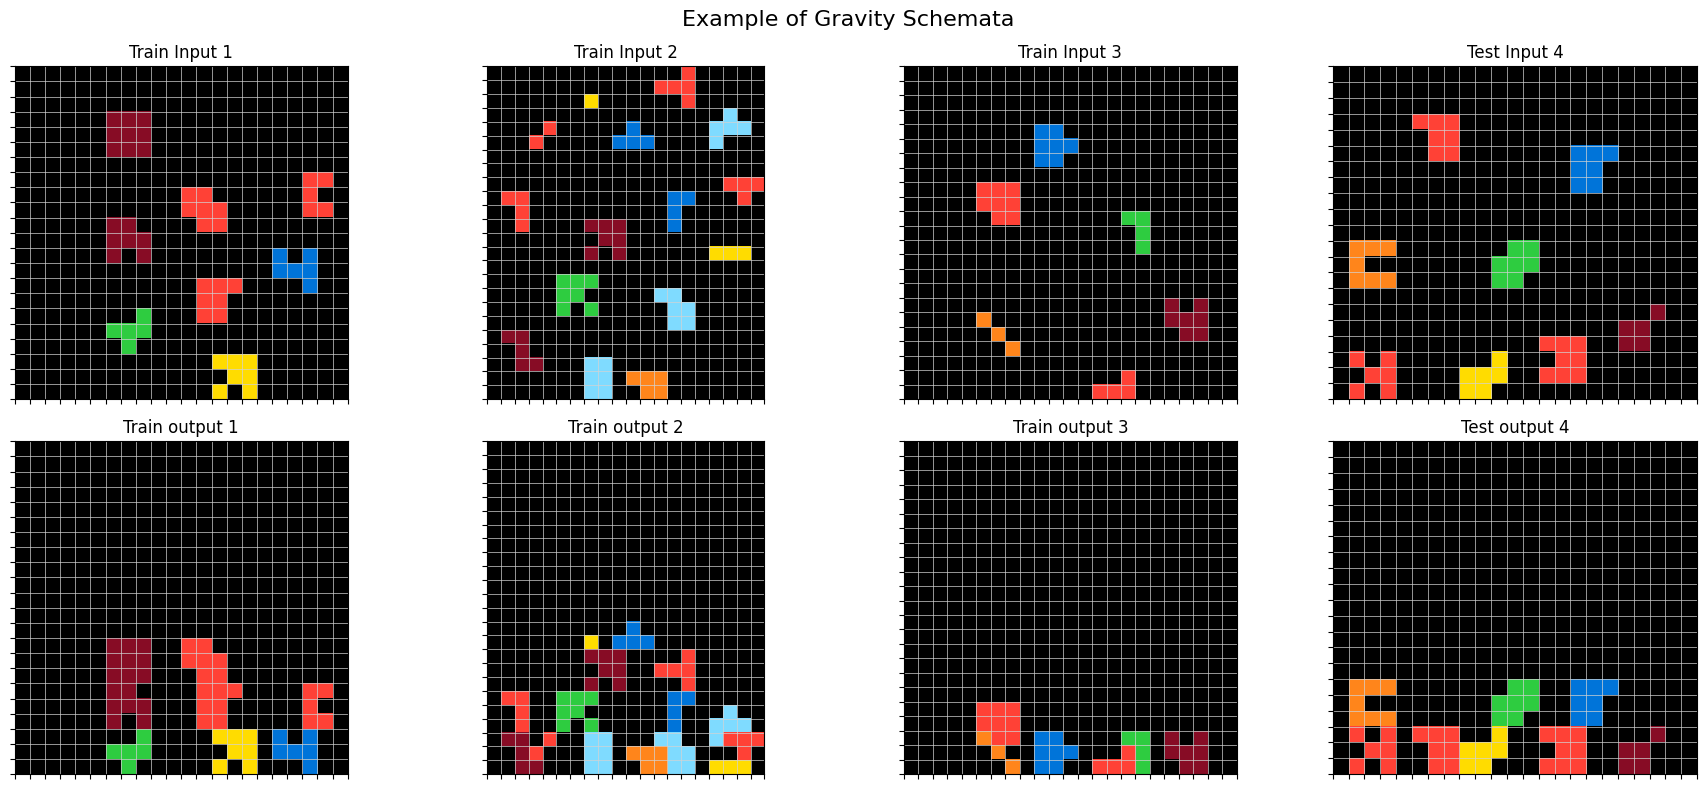

In [31]:
import sys
sys.path.append('../../../../ARC_Challenge/')
from ARC_World.general_utils import plot_grid, plot_task
plotable = from_grid_list_to_dict(x[1].task)

plot_task(plotable, task_config={}, suptitle = 'Example of Gravity Schemata')

In [13]:
plotable

[{'input': array([[ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
           6,  6,  6,  6,  6,  6, 10, 10, 10, 10, 10, 10, 10, 10],
         [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
           6,  6,  6,  6,  6,  6, 10, 10, 10, 10, 10, 10, 10, 10],
         [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
           6,  6,  6,  6,  6,  6, 10, 10, 10, 10, 10, 10, 10, 10],
         [ 6,  6,  6,  6,  6,  6,  9,  9,  9,  6,  6,  6,  6,  6,  6,  6,
           6,  6,  6,  6,  6,  6, 10, 10, 10, 10, 10, 10, 10, 10],
         [ 6,  6,  6,  6,  6,  6,  9,  9,  9,  6,  6,  6,  6,  6,  6,  6,
           6,  6,  6,  6,  6,  6, 10, 10, 10, 10, 10, 10, 10, 10],
         [ 6,  6,  6,  6,  6,  6,  9,  9,  9,  6,  6,  6,  6,  6,  6,  6,
           6,  6,  6,  6,  6,  6, 10, 10, 10, 10, 10, 10, 10, 10],
         [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
           6,  6,  6,  6,  6,  6, 10, 10, 10, 10, 10, 10, 10, 10],
    